# Finding if a Coin is Fair or Fake 

We consider the folowing problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake.

This can be cast as a model selection problem:

\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5\mathcal{B}(\pi; a, b)+ 0.5\mathcal{B}(\pi; b,a) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

This model defines the following:
- The indicator $m$, that denotes if the coin is fake,
- What a fake coin is: a fake coin is one that has an arbitrary probability $\pi_1$ between $0$ and $1$. 
- What a fair coin is: a fair coin has $\pi_1 = 0.5$

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X | \pi_1) p(\pi_1|m)
\end{eqnarray}

###### Not Fake
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X| \pi_1) \delta(\pi_1 - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake

\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(\pi_1; a, b) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \left(0.5\mathcal{B}(\pi; a, b)+ 0.5\mathcal{B}(\pi; b,a)\right) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(0.5\int d\pi_1 \left(1-\pi_1\right)^{c_0+a-1} \pi_1^{c_1+b-1} + 0.5\int d\pi_1 \left(1-\pi_1\right)^{c_0+b-1} \pi_1^{c_1+a-1}\right) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(0.5\frac{\Gamma(c_0+a)\Gamma(c_1+b)}{\Gamma(c_0 + c_1 +a + b)}
+0.5\frac{\Gamma(c_0+b)\Gamma(c_1+a)}{\Gamma(c_0 + c_1 +a + b)}\right)\\
& = & 0.5\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(\frac{\Gamma(c_0+a)\Gamma(c_1+b)+\Gamma(c_0+b)\Gamma(c_1+a)}{\Gamma(c_0 + c_1 +a + b)}\right)
\end{eqnarray}

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sps

def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake =np.log(0.5)+ sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) + np.log((sps.gamma(c_0+a) * sps.gamma(c_1+b))+ sps.gamma(c_0+b) * sps.gamma(c_1+a))-sps.gammaln(N+a + b) 
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
a = 20
b = 3



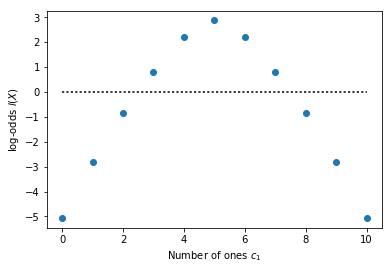

In [18]:
a = 20
b = 3
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

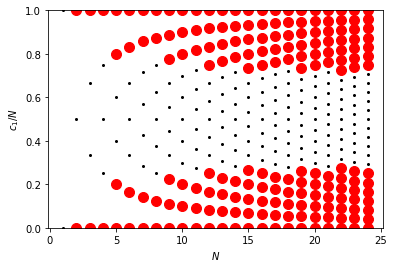

In [20]:
a = 20
b = 3

for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()